# Dataset:
1. Our training dataset can be found [here](https://onedrive.live.com/?authkey=%21ABJMt2rGTQvCxyM&id=3E1ACB43A24F0BDA%21122&cid=3E1ACB43A24F0BDA)
2. Training of our model was done on the above mentioned Arousal, Valence and Tension dataset. 

# Instructions to run this code:
1. `git clone https://github.com/akshayDev17/emotion_dataset.git`

# Models:
1. We have used 4 models for these classification tasks: ridge, Kneighbors, svm, decision-tree classifiers.

# Procedure:
1. We plan on performing 3 binary classifications, namely Arousal-positive vs Arousal-negative, Valence-positive vs Valence-negative and Tension-positive vs Tension-negative.
2. For all the models, we firstly use their default classifier-API, without specifiying any parameters.
3. Then we try to perform grid Search, under a confined parameter space, to obtain the best hyper-parameter values for those models.
4. Lastly, we compare the grid searched and default classifier-models, to funnel out the best classifier for each emotion-type

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
def getFeatures(path):
    y, sr = librosa.load(path)
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_delta = librosa.feature.delta(mfcc)
    
    features = []
    features.append(np.mean(cent))
    features.append(np.mean(spec_bw))
    features.append(np.mean(rolloff))
    features.append(np.mean(chroma_cens))
    for coefficient in mfcc:
        features.append(np.mean(coefficient))
    return features   

## Arousal-data-collection:
We separated the arousal-only tracks, based on positive and negative arousal.

In [92]:
arousal_directory = "./emotion_dataset/Arousal/"
arousal_feature_set, arousal_y_labels = [], []

In [84]:
print(os.getcwd())

/home/akpmnmy2j/MMT_assignment2


Extracting features for the arousal-positive and arousal-negative music data

In [85]:
dirContents = os.listdir(arousal_directory)
for music in dirContents:
    temp_y_label = music.split("_")[-1][:2]
    if temp_y_label == "AN" or temp_y_label == "AP":
        currSongFeatures = getFeatures(arousal_directory+music)
        arousal_feature_set.append(currSongFeatures)
        arousal_y_labels.append(temp_y_label)

/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py

/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py

/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py

In [9]:
print(set(arousal_y_labels))

{'AP', 'AN'}


In [10]:
arousal_feature_set = np.array(arousal_feature_set)
arousal_feature_set.shape

(104, 24)

In [11]:
arousal_y = np.array(arousal_y_labels)
arousal_y.shape

(104,)

Check distribution of labelled dataset

(array([52.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 52.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

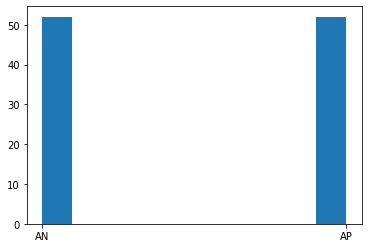

In [12]:
plt.hist(arousal_y)

In [13]:
arousal_x_train, arousal_x_test, arousal_y_train, arousal_y_test = train_test_split(arousal_feature_set, arousal_y, test_size=0.2, random_state=1231)

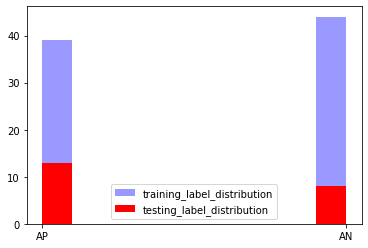

In [14]:
plt.hist(arousal_y_train, color='b', alpha=0.4, label='training_label_distribution')
plt.hist(arousal_y_test, color='r', label='testing_label_distribution')
plt.legend()
plt.show()

## Valence-data-collection

In [15]:
valence_feature_set, valence_y_labels = [], []
valence_directory = "./emotion_dataset/Valence/"

Extracting features for the arousal-positive and arousal-negative music data

In [16]:
print(os.getcwd())

/home/akpmnmy2j/MMT_assignment2


In [17]:
dirContents = os.listdir(valence_directory)
for music in dirContents:
    temp_y_label = music.split("_")[-1][:2]
    if temp_y_label == "VN" or temp_y_label == "VP":
        currSongFeatures = getFeatures(valence_directory+music)
        valence_feature_set.append(currSongFeatures)
        valence_y_labels.append(temp_y_label)

/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py

/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py

/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py

/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py

In [18]:
print(set(valence_y_labels))

{'VP', 'VN'}


In [19]:
valence_feature_set = np.array(valence_feature_set)
valence_feature_set.shape

(116, 24)

In [20]:
valence_y = np.array(valence_y_labels)
valence_y.shape

(116,)

Check distribution of labelled dataset

(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

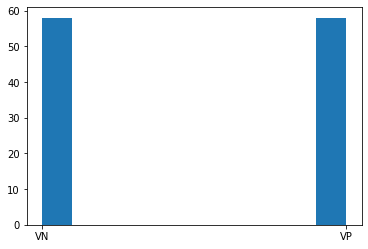

In [21]:
plt.hist(valence_y)

In [22]:
valence_x_train, valence_x_test, valence_y_train, valence_y_test = train_test_split(valence_feature_set, valence_y, test_size=0.2, random_state=1231)

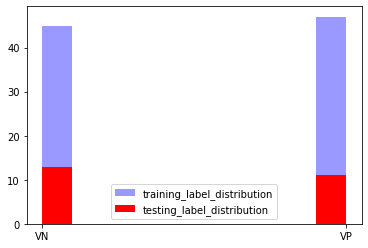

In [23]:
plt.hist(valence_y_train, color='b', alpha=0.4, label='training_label_distribution')
plt.hist(valence_y_test, color='r', label='testing_label_distribution')
plt.legend()
plt.show()

## Tension-data-collection

In [4]:
tension_feature_set, tension_y_labels = [], []
tension_directory = "./emotion_dataset/Tension/"

In [5]:
dirContents = os.listdir(tension_directory)
for music in dirContents:
    temp_y_label = music.split("_")[-1][:2]
    if temp_y_label == "TN" or temp_y_label == "TP":
        currSongFeatures = getFeatures(tension_directory+music)
        tension_feature_set.append(currSongFeatures)
        tension_y_labels.append(temp_y_label)

/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py

/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py

/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/akpmnmy2j/miniconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/librosa/core/audio.py

In [24]:
tension_feature_set = np.array(tension_feature_set)
print(tension_feature_set.shape)
tension_y = np.array(tension_y_labels)
print(tension_y.shape)

(108, 24)
(108,)


(array([54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 54.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

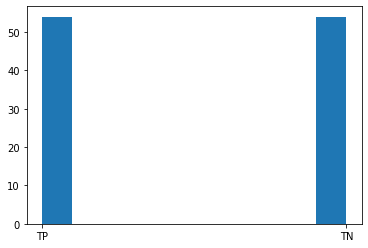

In [25]:
plt.hist(tension_y)

In [26]:
tension_x_train, tension_x_test, tension_y_train, tension_y_test = train_test_split(tension_feature_set, tension_y, test_size=0.2, random_state=1231)

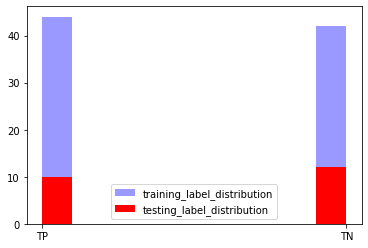

In [27]:
plt.hist(tension_y_train, color='b', alpha=0.4, label='training_label_distribution')
plt.hist(tension_y_test, color='r', label='testing_label_distribution')
plt.legend()
plt.show()

# Model-1: Ridge Classifier

In [28]:
from sklearn.linear_model import RidgeClassifier

## Arousal-Classification using model-1

Lets see for the default classifier, what are the accuracies for training and validation

In [29]:
ridge_clf_arousal_default = RidgeClassifier()
ridge_clf_arousal_default.fit(arousal_x_train,arousal_y_train)
print("training accuracy, on the arousal_x_train data is: ",ridge_clf_arousal_default.score(arousal_x_train, arousal_y_train))
print("testing accuracy, on the arousal_x_test data is: ",ridge_clf_arousal_default.score(arousal_x_test, arousal_y_test))

training accuracy, on the arousal_x_train data is:  0.8433734939759037
testing accuracy, on the arousal_x_test data is:  0.6666666666666666


Performing **Grid search** to get a knowledge of hyperparameter tuning:
1. Alpha value
2. normalize
3. class_weight

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

alpha=[i/10 for i in range(1,11)]
is_normalize=[True, False]
max_iter_arr = [i*10000 for i in range(1,11)]

grid=dict(alpha=alpha, normalize=is_normalize, max_iter=max_iter_arr)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ridge_clf_arousal_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(arousal_x_train, arousal_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.720833 using {'alpha': 1.0, 'max_iter': 10000, 'normalize': True}


In [31]:
ridge_clf_arousal_gridSearched = RidgeClassifier(alpha=1.0, normalize=True, max_iter=10000)
ridge_clf_arousal_gridSearched.fit(arousal_x_train,arousal_y_train)
print("training accuracy, on the arousal_x_train data is: ",ridge_clf_arousal_gridSearched.score(arousal_x_train, arousal_y_train))
print("testing accuracy, on the arousal_x_test data is: ",ridge_clf_arousal_gridSearched.score(arousal_x_test, arousal_y_test))

training accuracy, on the arousal_x_train data is:  0.7831325301204819
testing accuracy, on the arousal_x_test data is:  0.6666666666666666


## Valence Classification

Lets take a look at how a normal, parametrised-by-default ridge classifier performs on valence data

In [32]:
ridge_clf_valence_default = RidgeClassifier().fit(valence_x_train,valence_y_train)

In [33]:
print("training accuracy, on the valence_x_train data is: ",ridge_clf_valence_default.score(valence_x_train, valence_y_train))
print("testing accuracy, on the valence_x_test data is: ",ridge_clf_valence_default.score(valence_x_test, valence_y_test))

training accuracy, on the valence_x_train data is:  0.8260869565217391
testing accuracy, on the valence_x_test data is:  0.5833333333333334


Trying **Grid Search** for hyper-parameter tuning for this classifier

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# defining hyperparameter choices
alpha=[i/10 for i in range(1,11)]
is_normalize=[True, False]
class_weight=['balanced', None]

grid=dict(alpha=alpha, normalize=is_normalize, class_weight=class_weight)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ridge_clf_valence_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(valence_x_train, valence_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.635926 using {'alpha': 0.2, 'class_weight': None, 'normalize': False}


In [35]:
ridge_clf_valence_gridSearched = RidgeClassifier(alpha=0.2, class_weight=None, normalize=False)
ridge_clf_valence_gridSearched.fit(valence_x_train,valence_y_train)
print("training accuracy, on the valence_x_train data is: ",ridge_clf_valence_gridSearched.score(valence_x_train, valence_y_train))
print("testing accuracy, on the valence_x_test data is: ",ridge_clf_valence_gridSearched.score(valence_x_test, valence_y_test))

training accuracy, on the valence_x_train data is:  0.8260869565217391
testing accuracy, on the valence_x_test data is:  0.5833333333333334


## Tension Classification

Lets take a look at how a normal, parametrised-by-default ridge classifier performs on valence data

In [36]:
ridge_clf_tension_default = RidgeClassifier().fit(tension_x_train,tension_y_train)

In [37]:
print("training accuracy, on the tension_x_train data is: ",ridge_clf_tension_default.score(tension_x_train, tension_y_train))
print("testing accuracy, on the tension_x_test data is: ",ridge_clf_tension_default.score(tension_x_test, tension_y_test))

training accuracy, on the tension_x_train data is:  0.7790697674418605
testing accuracy, on the tension_x_test data is:  0.7727272727272727


Trying **Grid Search** for hyper-parameter tuning for this classifier

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# defining hyperparameter choices
alpha=[i/10 for i in range(1,11)]
is_normalize=[True, False]
class_weight=['balanced', None]

grid=dict(alpha=alpha, normalize=is_normalize, class_weight=class_weight)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ridge_clf_tension_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(tension_x_train, tension_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.665278 using {'alpha': 0.2, 'class_weight': None, 'normalize': False}


In [42]:
ridge_clf_tension_gridSearched = RidgeClassifier(alpha=0.2, class_weight=None, normalize=False)
ridge_clf_tension_gridSearched.fit(tension_x_train,tension_y_train)
print("training accuracy, on the tension_x_train data is: ",ridge_clf_tension_gridSearched.score(tension_x_train, tension_y_train))
print("validation accuracy, on the tension_x_test data is: ",ridge_clf_tension_gridSearched.score(tension_x_test, tension_y_test))

training accuracy, on the tension_x_train data is:  0.7790697674418605
validation accuracy, on the tension_x_test data is:  0.7727272727272727


# Model-2: KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

## Arousal-classification

Using a default-valued knclassifier at first

In [44]:
knc_arousal_default = KNeighborsClassifier()
knc_arousal_default.fit(arousal_x_train,arousal_y_train)
print("training accuracy, on the arousal_x_train data is: ",knc_arousal_default.score(arousal_x_train, arousal_y_train))
print("validation accuracy, on the arousal_x_test data is: ",knc_arousal_default.score(arousal_x_test, arousal_y_test))

training accuracy, on the arousal_x_train data is:  0.7228915662650602
validation accuracy, on the arousal_x_test data is:  0.6190476190476191


Trying to tune hyperparameters:
1. n_neighbors(default=5)

In [47]:
# defining hyperparameter choices
n_neighbors_arr=[i for i in range(1,11)]
algorithm_arr = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric_arr = ['euclidean', 'minkowski']
weights_arr=['uniform', 'distance']

grid=dict(n_neighbors=n_neighbors_arr, algorithm=algorithm_arr, metric=metric_arr, weights=weights_arr)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knc_arousal_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(arousal_x_train, arousal_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.712037 using {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}


In [48]:
knc_arousal_gridSearched = KNeighborsClassifier(algorithm='auto', metric='euclidean', n_neighbors=8, weights='distance')
knc_arousal_gridSearched.fit(arousal_x_train,arousal_y_train)
print("training accuracy, on the arousal_x_train data is: ",knc_arousal_gridSearched.score(arousal_x_train, arousal_y_train))
print("validation accuracy, on the arousal_x_test data is: ",knc_arousal_gridSearched.score(arousal_x_test, arousal_y_test))

training accuracy, on the arousal_x_train data is:  1.0
validation accuracy, on the arousal_x_test data is:  0.6666666666666666


## Valence Classification

Lets take a look at how a normal, parametrised-by-default ridge classifier performs on valence data

In [49]:
knc_valence_default = KNeighborsClassifier()
knc_valence_default.fit(valence_x_train,valence_y_train)
print("training accuracy, on the valence_x_train data is: ",knc_valence_default.score(valence_x_train, valence_y_train))
print("validation accuracy, on the valence_x_test data is: ",knc_valence_default.score(valence_x_test, valence_y_test))

training accuracy, on the valence_x_train data is:  0.6739130434782609
validation accuracy, on the valence_x_test data is:  0.625


Trying **Grid Search** for hyper-parameter tuning for this classifier

In [50]:
# defining hyperparameter choices
n_neighbors_arr=[i for i in range(1,21)]
algorithm_arr = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric_arr = ['euclidean', 'minkowski']
weights_arr=['uniform', 'distance']

grid=dict(n_neighbors=n_neighbors_arr, algorithm=algorithm_arr, metric=metric_arr, weights=weights_arr)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knc_valence_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(valence_x_train, valence_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.664444 using {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [51]:
knc_valence_gridSearched = KNeighborsClassifier(algorithm='auto', metric='euclidean', n_neighbors=9, weights='distance')
knc_valence_gridSearched.fit(valence_x_train,valence_y_train)
print("training accuracy, on the valence_x_train data is: ",knc_valence_gridSearched.score(valence_x_train, valence_y_train))
print("validation accuracy, on the valence_x_test data is: ",knc_valence_gridSearched.score(valence_x_test, valence_y_test))

training accuracy, on the valence_x_train data is:  1.0
validation accuracy, on the valence_x_test data is:  0.6666666666666666


## Tension Classification

Lets take a look at how a normal, parametrised-by-default ridge classifier performs on valence data

In [52]:
knc_tension_default = KNeighborsClassifier()
knc_tension_default.fit(tension_x_train,tension_y_train)
print("training accuracy, on the tension_x_train data is: ",knc_tension_default.score(tension_x_train, tension_y_train))
print("validation accuracy, on the tension_x_test data is: ",knc_tension_default.score(tension_x_test, tension_y_test))

training accuracy, on the tension_x_train data is:  0.6627906976744186
validation accuracy, on the tension_x_test data is:  0.45454545454545453


Trying **Grid Search** for hyper-parameter tuning for this classifier

In [53]:
n_neighbors_arr=[i for i in range(1,20)]
algorithm_arr = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric_arr = ['euclidean', 'minkowski']
weights_arr=['uniform', 'distance']

grid=dict(n_neighbors=n_neighbors_arr, algorithm=algorithm_arr, metric=metric_arr, weights=weights_arr)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knc_tension_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(tension_x_train, tension_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.512037 using {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [54]:
knc_tension_gridSearched = KNeighborsClassifier(algorithm='auto', metric='euclidean', n_neighbors=3, weights='distance')
knc_tension_gridSearched.fit(tension_x_train,tension_y_train)
print("training accuracy, on the tension_x_train data is: ",knc_tension_gridSearched.score(tension_x_train, tension_y_train))
print("validation accuracy, on the tension_x_test data is: ",knc_tension_gridSearched.score(tension_x_test, tension_y_test))

training accuracy, on the tension_x_train data is:  1.0
validation accuracy, on the tension_x_test data is:  0.45454545454545453


# Model-3 : Support Vector Classifier

In [55]:
from sklearn.svm import SVC

## Arousal-classification

In [56]:
svc_arousal_default = SVC()
svc_arousal_default.fit(arousal_x_train,arousal_y_train)
print("training accuracy, on the arousal_x_train data is: ",svc_arousal_default.score(arousal_x_train, arousal_y_train))
print("validation accuracy, on the arousal_x_test data is: ",svc_arousal_default.score(arousal_x_test, arousal_y_test))

training accuracy, on the arousal_x_train data is:  0.7469879518072289
validation accuracy, on the arousal_x_test data is:  0.5714285714285714


Performing **Grid search** to get a knowledge of hyperparameter tuning:
1. Kernel function
2. regularization parameter(C)

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

kernel_arr = ['rbf', 'sigmoid', 'linear', 'poly']
c_arr = [100, 10, 1.0, 0.1, 0.001]

grid=dict(C=c_arr, kernel=kernel_arr)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc_arousal_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(arousal_x_train, arousal_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.711111 using {'C': 10, 'kernel': 'rbf'}


In [58]:
svc_arousal_gridSearched = SVC(C=10, kernel='rbf')
svc_arousal_gridSearched.fit(arousal_x_train,arousal_y_train)
print("training accuracy, on the arousal_x_train data is: ",svc_arousal_gridSearched.score(arousal_x_train, arousal_y_train))
print("validation accuracy, on the arousal_x_test data is: ",svc_arousal_gridSearched.score(arousal_x_test, arousal_y_test))

training accuracy, on the arousal_x_train data is:  0.7590361445783133
validation accuracy, on the arousal_x_test data is:  0.6190476190476191


## Valence Classification

In [59]:
svc_valence_default = SVC()
svc_valence_default.fit(valence_x_train,valence_y_train)
print("training accuracy, on the valence_x_train data is: ",svc_valence_default.score(valence_x_train, valence_y_train))
print("validation accuracy, on the valence_x_test data is: ",svc_valence_default.score(valence_x_test, valence_y_test))

training accuracy, on the valence_x_train data is:  0.532608695652174
validation accuracy, on the valence_x_test data is:  0.5833333333333334


Performing **Grid search** to get a knowledge of hyperparameter tuning:
1. Kernel function
2. regularization parameter(C)

Performing grid search on <font color="red">svm-based classifier will take some serious computation power</font>, therefore i request you to run it on **ADA** or other equivalent HPC devices. 

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

kernel_arr = ['rbf', 'sigmoid', 'linear', 'poly']
c_arr = [200, 100, 10, 1.0, 0.1, 0.001]

grid=dict(C=c_arr, kernel=kernel_arr)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc_valence_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(valence_x_train, valence_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.672222 using {'C': 0.001, 'kernel': 'linear'}


In [61]:
svc_valence_gridSearched = SVC(C=0.001, kernel='linear')
svc_valence_gridSearched.fit(valence_x_train,valence_y_train)
print("training accuracy, on the valence_x_train data is: ",svc_valence_gridSearched.score(valence_x_train, valence_y_train))
print("validation accuracy, on the valence_x_test data is: ",svc_valence_gridSearched.score(valence_x_test, valence_y_test))

training accuracy, on the valence_x_train data is:  0.7934782608695652
validation accuracy, on the valence_x_test data is:  0.5833333333333334


## Tension Classification

Lets take a look at how a normal, parametrised-by-default ridge classifier performs on valence data

In [75]:
svc_tension_default = SVC()
svc_tension_default.fit(tension_x_train,tension_y_train)
print("training accuracy, on the tension_x_train data is: ",svc_tension_default.score(tension_x_train, tension_y_train))
print("validation accuracy, on the tension_x_test data is: ",svc_tension_default.score(tension_x_test, tension_y_test))

training accuracy, on the tension_x_train data is:  0.5116279069767442
validation accuracy, on the tension_x_test data is:  0.5909090909090909


* Trying **Grid Search** for hyper-parameter tuning for this classifier

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

kernel_arr = ['rbf', 'sigmoid', 'linear', 'poly']
c_arr = [100, 10, 1.0, 0.1]

grid=dict(C=c_arr, kernel=kernel_arr)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc_tension_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(tension_x_train, tension_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.599074 using {'C': 0.1, 'kernel': 'linear'}


In [77]:
svc_tension_gridSearched = SVC(kernel='linear', C=0.1)
svc_tension_gridSearched.fit(tension_x_train,tension_y_train)
print("training accuracy, on the tension_x_train data is: ",svc_tension_gridSearched.score(tension_x_train, tension_y_train))
print("validation accuracy, on the tension_x_test data is: ",svc_tension_gridSearched.score(tension_x_test, tension_y_test))

training accuracy, on the tension_x_train data is:  0.813953488372093
validation accuracy, on the tension_x_test data is:  0.6363636363636364


# Model-4 : Decision-tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

## Arousal-Classification

In [63]:
dt_arousal_default = DecisionTreeClassifier()
dt_arousal_default.fit(arousal_x_train,arousal_y_train)
print("training accuracy, on the arousal_x_train data is: ",dt_arousal_default.score(arousal_x_train, arousal_y_train))
print("validation accuracy, on the arousal_x_test data is: ",dt_arousal_default.score(arousal_x_test, arousal_y_test))

training accuracy, on the arousal_x_train data is:  1.0
validation accuracy, on the arousal_x_test data is:  0.7142857142857143


Performing **Grid search** to get a knowledge of hyperparameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

criterion=['entropy', 'gini']
max_depth=[1, 3, 5, None]
splitter = ['best', 'random']

grid=dict(criterion=criterion, max_depth=max_depth, splitter=splitter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=dt_arousal_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(arousal_x_train, arousal_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.668519 using {'criterion': 'entropy', 'max_depth': 1, 'splitter': 'random'}


In [65]:
dt_arousal_gridSearched = DecisionTreeClassifier(criterion='entropy', max_depth=1, splitter='random')
dt_arousal_gridSearched.fit(arousal_x_train,arousal_y_train)
print("training accuracy, on the arousal_x_train data is: ",dt_arousal_gridSearched.score(arousal_x_train, arousal_y_train))
print("validation accuracy, on the arousal_x_test data is: ",dt_arousal_gridSearched.score(arousal_x_test, arousal_y_test))

training accuracy, on the arousal_x_train data is:  0.6987951807228916
validation accuracy, on the arousal_x_test data is:  0.6190476190476191


## Valence Classification

In [66]:
dt_valence_default = DecisionTreeClassifier()
dt_valence_default.fit(valence_x_train,valence_y_train)
print("training accuracy, on the valence_x_train data is: ",dt_valence_default.score(valence_x_train, valence_y_train))
print("validation accuracy, on the valence_x_test data is: ",dt_valence_default.score(valence_x_test, valence_y_test))

training accuracy, on the valence_x_train data is:  1.0
validation accuracy, on the valence_x_test data is:  0.5833333333333334


Performing **Grid search** to get a knowledge of hyperparameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

criterion=['entropy', 'gini']
max_depth=[1, 3, 5, None]
splitter = ['best', 'random']

grid=dict(criterion=criterion, max_depth=max_depth, splitter=splitter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=dt_valence_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(valence_x_train, valence_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.582963 using {'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}


In [68]:
dt_valence_gridSearched = DecisionTreeClassifier(criterion='entropy', max_depth=None, splitter='random')
dt_valence_gridSearched.fit(valence_x_train,valence_y_train)
print("training accuracy, on the valence_x_train data is: ",dt_valence_gridSearched.score(valence_x_train, valence_y_train))
print("validation accuracy, on the valence_x_test data is: ",dt_valence_gridSearched.score(valence_x_test, valence_y_test))

training accuracy, on the valence_x_train data is:  1.0
validation accuracy, on the valence_x_test data is:  0.625


## Tension Classification

Lets take a look at how a normal, parametrised-by-default ridge classifier performs on valence data

In [69]:
dt_tension_default = DecisionTreeClassifier()
dt_tension_default.fit(tension_x_train,tension_y_train)
print("training accuracy, on the tension_x_train data is: ",dt_tension_default.score(tension_x_train, tension_y_train))
print("validation accuracy, on the tension_x_test data is: ",dt_tension_default.score(tension_x_test, tension_y_test))

training accuracy, on the tension_x_train data is:  1.0
validation accuracy, on the tension_x_test data is:  0.6363636363636364


Trying **Grid Search** for hyper-parameter tuning for this classifier

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

criterion=['entropy', 'gini']
max_depth=[1, 3, 5, None]
splitter = ['best', 'random']

grid=dict(criterion=criterion, max_depth=max_depth, splitter=splitter)
grid_search = GridSearchCV(estimator=dt_tension_default, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(tension_x_train, tension_y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.558333 using {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}


In [71]:
dt_tension_gridSearched = DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')
dt_tension_gridSearched.fit(tension_x_train,tension_y_train)
print("training accuracy, on the tension_x_train data is: ",dt_tension_gridSearched.score(tension_x_train, tension_y_train))
print("validation accuracy, on the tension_x_test data is: ",dt_tension_gridSearched.score(tension_x_test, tension_y_test))

training accuracy, on the tension_x_train data is:  0.6976744186046512
validation accuracy, on the tension_x_test data is:  0.5909090909090909


# Arousal-classification:

We compare all the 8 models:
1. default and gridSearched Ridge classifier
2. default and gridSearched k neighbors classifier
3. default and gridSearched SVM classifier
4. default and gridSearched decision tree classifier

In [72]:
arousal_scores = []
arousal_scores.append(ridge_clf_arousal_default.score(arousal_x_test, arousal_y_test))
arousal_scores.append(ridge_clf_arousal_gridSearched.score(arousal_x_test, arousal_y_test))
arousal_scores.append(knc_arousal_default.score(arousal_x_test, arousal_y_test))
arousal_scores.append(knc_arousal_gridSearched.score(arousal_x_test, arousal_y_test))
arousal_scores.append(svc_arousal_default.score(arousal_x_test, arousal_y_test))
arousal_scores.append(svc_arousal_gridSearched.score(arousal_x_test, arousal_y_test))
arousal_scores.append(dt_arousal_default.score(arousal_x_test, arousal_y_test))
arousal_scores.append(dt_arousal_gridSearched.score(arousal_x_test, arousal_y_test))

n = ['def-ridge', 'grid-ridge', 'def-knc', 'grid-knc', 'def-svc', 'grid-svc', 'def-dt','grid-dt']

print("The best classifier for arousal classification is : %s, with testing accuracy of : %f " % (n[np.argmax(arousal_scores)], arousal_scores[np.argmax(arousal_scores)]))

The best classifier for arousal classification is : def-dt, with testing accuracy of : 0.714286 


# Valence Classification:
We compare all the 8 models:
1. default and gridSearched Ridge classifier
2. default and gridSearched k neighbors classifier
3. default and gridSearched SVM classifier
4. default and gridSearched decision tree classifier

In [73]:
valence_scores = []
valence_scores.append(ridge_clf_valence_default.score(valence_x_test, valence_y_test))
valence_scores.append(ridge_clf_valence_gridSearched.score(valence_x_test, valence_y_test))
valence_scores.append(knc_valence_default.score(valence_x_test, valence_y_test))
valence_scores.append(knc_valence_gridSearched.score(valence_x_test, valence_y_test))
valence_scores.append(svc_valence_default.score(valence_x_test, valence_y_test))
valence_scores.append(svc_valence_gridSearched.score(valence_x_test, valence_y_test))
valence_scores.append(dt_valence_default.score(valence_x_test, valence_y_test))
valence_scores.append(dt_valence_gridSearched.score(valence_x_test, valence_y_test))

n = ['def-ridge', 'grid-ridge', 'def-knc', 'grid-knc', 'def-svc', 'grid-svc', 'def-dt','grid-dt']

print("The best classifier for valence classification is : %s, with testing accuracy of : %f " % (n[np.argmax(valence_scores)], valence_scores[np.argmax(valence_scores)]))

The best classifier for valence classification is : grid-knc, with testing accuracy of : 0.666667 


# Tension Classification:
We compare all the 8 models:
1. default and gridSearched Ridge classifier
2. default and gridSearched k neighbors classifier
3. default and gridSearched SVM classifier
4. default and gridSearched decision tree classifier

In [78]:
tension_scores = []
tension_scores.append(ridge_clf_tension_default.score(tension_x_test, tension_y_test))
tension_scores.append(ridge_clf_tension_gridSearched.score(tension_x_test, tension_y_test))
tension_scores.append(knc_tension_default.score(tension_x_test, tension_y_test))
tension_scores.append(knc_tension_gridSearched.score(tension_x_test, tension_y_test))
tension_scores.append(svc_tension_default.score(tension_x_test, tension_y_test))
tension_scores.append(svc_tension_gridSearched.score(tension_x_test, tension_y_test))
tension_scores.append(dt_tension_default.score(tension_x_test, tension_y_test))
tension_scores.append(dt_tension_gridSearched.score(tension_x_test, tension_y_test))

n = ['def-ridge', 'grid-ridge', 'def-knc', 'grid-knc', 'def-svc', 'grid-svc', 'def-dt','grid-dt']

print("The best classifier for tension classification is : %s, with testing accuracy of : %f " % (n[np.argmax(tension_scores)], tension_scores[np.argmax(tension_scores)]))

The best classifier for tension classification is : def-ridge, with testing accuracy of : 0.772727 


# Voting Classifier 
1. We planned on trying out a voting classifier, based on the above obtained results.
2. We chose those classifiers which performed the best in all the 3 classification tasks.

In [79]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('ridge', ridge_clf_tension_default),('knc', knc_valence_gridSearched),('dt', dt_arousal_default)])

### Evaluating **arousal classification** over the voting classifier

In [80]:
voting_clf = voting_clf.fit(arousal_x_train, arousal_y_train)
print("Accuracy of voting classifier on the test data is: ", voting_clf.score(arousal_x_test, arousal_y_test))

Accuracy of voting classifier on the test data is:  0.6666666666666666


### Evaluating **valence classification** over the voting classifier

In [81]:
voting_clf = voting_clf.fit(valence_x_train, valence_y_train)
print("Accuracy of voting classifier on the test data is: ", voting_clf.score(valence_x_test, valence_y_test))

Accuracy of voting classifier on the test data is:  0.625


### Evaluating **tension classification** over the voting classifier

In [82]:
voting_clf = voting_clf.fit(tension_x_train, tension_y_train)
print("Accuracy of voting classifier on the test data is: ", voting_clf.score(tension_x_test, tension_y_test))

Accuracy of voting classifier on the test data is:  0.6818181818181818
